# k-medias
Ejemplo de implementación del algoritmo k-medias utilizando el conjunto de datos de modelo de negocios de distribución.

### Conjunto de Datos

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

datos = pd.read_csv('S7_KMEANS_RESELLER_Daily.csv')
datos.head(10)

,Country,ResellerID,Trans12Mo,Units12Mo
0,Argentina,4810912,1,1
1,Argentina,56864507,1,1
2,Argentina,54239933,1,1
3,Argentina,54310743,1,1
4,Argentina,56624338,1,1
5,Argentina,18682185,1,1
6,Argentina,4338296,1,1
7,Argentina,379814,1,1
8,Argentina,38878909,1,1
9,Argentina,6720414,1,1


Text(0,0.5,'# of Licenses bought')

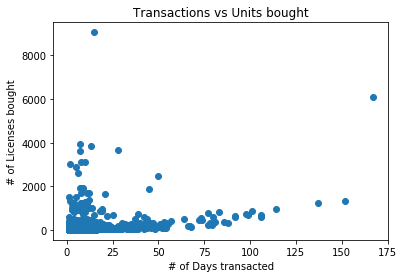

In [12]:
plt.scatter(datos['Trans12Mo'],datos['Units12Mo'])
plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

### Creación del modelo k-medias
Se utilizan las primeras dos características del conjunto de datos

In [34]:
X1 =np.array([datos['Trans12Mo'],datos['Units12Mo']])
X=np.transpose(X1)

print(X)

# Crear modelo e inducirlo
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=10)
modelo.fit(X)

[[   1    1]
 [   1    1]
 [   1    1]
 ...
 [   7 3950]
 [ 167 6079]
 [  15 9063]]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Inspección del modelo k-medias

Text(0,0.5,'# of Licenses bought')

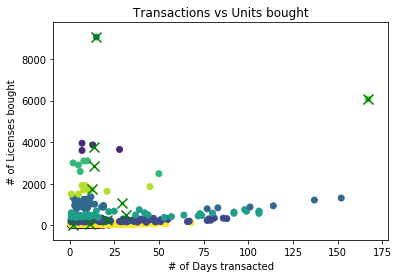

In [41]:
# Obtiene las etiquetas que especifican a qué grupo pertenecen los datos de X
y = modelo.predict(X)

# Obtiene las coordenadas de los centroides
C = modelo.cluster_centers_

# Grafica los datos agrupados
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'green', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

### Predicción de nuevos elementos

Text(0,0.5,'# of Licenses bought')

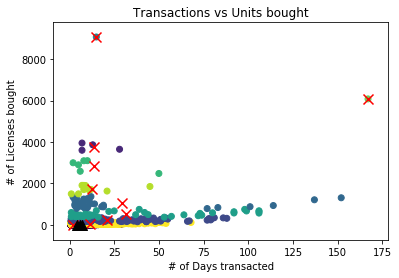

In [36]:
# Datos de prueba (originalmente no están en el conjunto de datos)
import numpy as np
Xp = np.array([[4,2],[6,4],[7,3.5]])

# Grafica los datos junto con los grupos obtenidos previamente
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],color = 'black', marker = '^', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

Text(0,0.5,'# of Licenses bought')

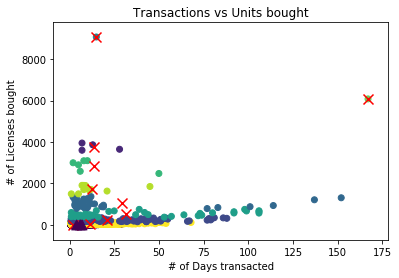

In [37]:
# Predice el grupo al que pertenecen
yp = modelo.predict(Xp)

# Grafica la predicción
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(C[:,0],C[:,1],marker='x',color = 'red', s = 100)

plt.scatter(Xp[:,0],Xp[:,1],c=yp, marker = '^', s = 100)

plt.title('Transactions vs Units bought')
plt.xlabel('# of Days transacted')
plt.ylabel('# of Licenses bought')

In [38]:
results = np.transpose(np.array([X[:,0],X[:,1],y]))
ResultsF=np.transpose(np.array([datos['ResellerID'],results[:,0],results[:,1],results[:,2]]))
print(ResultsF)

[[ 4810912        1        1        0]
 [56864507        1        1        0]
 [54239933        1        1        0]
 ...
 [58367305        7     3950        1]
 [15999341      167     6079        7]
 [39542070       15     9063        4]]


In [39]:
y=np.savetxt("report.csv",ResultsF,  delimiter=",")

In [40]:
modelo.score(X)

-4117849.671523385